<a href="https://colab.research.google.com/github/MRnickRuss/AI/blob/main/Pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [106]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [107]:
num_classes = 10
batch_size = 32
epoch = 24
img_rows, img_cols = 28,28

In [108]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

#Deal with format issues between different backends. Some put the no. of channels in the image before the width and height.
if K.image_data_format() == 'channels_first':
    trainX=trainX.reshape(trainX.shape[0],1,img_rows,img_cols)
    testX =testX.reshape(testX.shape[0],1,img_rows,img_cols)
    input_shape=(1,img_rows,img_cols)
else:
    trainX=trainX.reshape(trainX.shape[0],img_rows,img_cols,1)
    testX =testX.reshape(testX.shape[0],img_rows,img_cols,1)
    input_shape=(img_rows,img_cols,1)

trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX /= 255
testX /= 255

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


In [109]:
trainy = keras.utils.to_categorical(trainy,num_classes=num_classes)
testy = keras.utils.to_categorical(testy,num_classes=num_classes)

## 1.3. Визуализируем часть данных из датасета

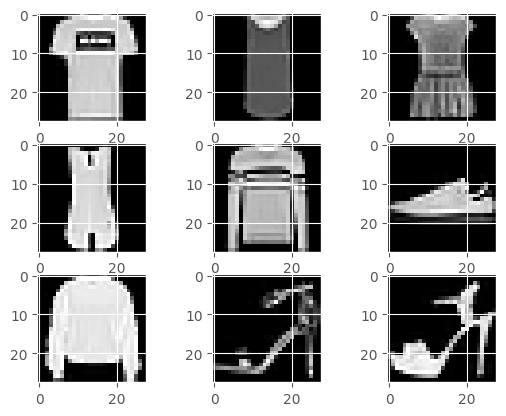

In [110]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [112]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2,2)))   #Removing MaxPooling layer: Add accuracy but reduces training speed
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 12, 12, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               1179776   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                      

## 1.5. Обучаем модель

In [113]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(trainX, trainy, batch_size=batch_size, epochs=EPOCH, validation_data=(testX,testy))

model.evaluate(testX, testy) # метод evaluate() предназначен для оценки уже обученной модели с использованием данных проверки
                                   #(или тестирования) и соответствующих меток. Возвращает значение потерь и значения показателей для модели.

Epoch 1/5
1875/1875 [==============================] - 120s 63ms/step - loss: 0.4672 - accuracy: 0.8337 - val_loss: 0.3238 - val_accuracy: 0.8815
Epoch 2/5
1875/1875 [==============================] - 101s 54ms/step - loss: 0.3051 - accuracy: 0.8917 - val_loss: 0.2521 - val_accuracy: 0.9074
Epoch 3/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2580 - accuracy: 0.9063 - val_loss: 0.2400 - val_accuracy: 0.9117
Epoch 4/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2266 - accuracy: 0.9179 - val_loss: 0.2210 - val_accuracy: 0.9189
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.2326 - accuracy: 0.9180


[0.2325865924358368, 0.9179999828338623]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

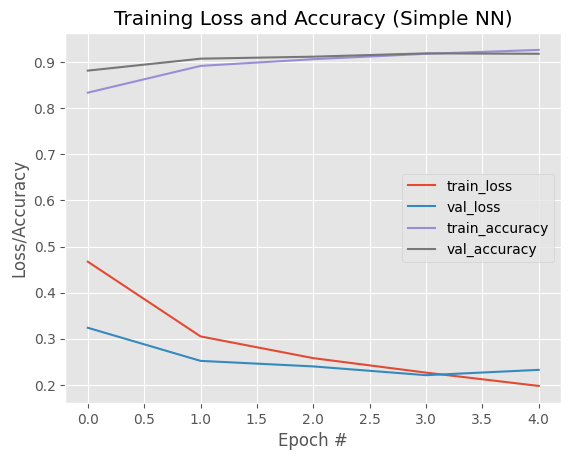

In [114]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [115]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files
uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его

image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

cv2_imshow(orig)

Saving 2024-05-11_19-54-19.png to 2024-05-11_19-54-19 (2).png


In [116]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 66ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [117]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [118]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [120]:
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [121]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/gdrive/MyDrive/archive_2/Data")))
random.shuffle(imagePaths)

In [122]:
from google.colab.patches import cv2_imshow

compression_size = 64

data, labels = load_images(imagePaths, compression_size)

In [123]:
data = np.array(data, dtype='float')
labels = np.array(labels)


print(data.shape)
print(labels.shape)

(3018, 64, 64, 3)
(3018,)


In [124]:
(X_train, X_val, Y_train, Y_val) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42)

X_train=X_train.astype('float32')/255
X_val=X_val.astype('float32')/255

print(X_train.shape)
print(X_train.shape)

(2263, 64, 64, 3)
(2263, 64, 64, 3)


In [125]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

print(Y_train.shape)
print(Y_val.shape)

print(Y_train[:3])
print(Y_val[:3])

(2263, 4)
(755, 4)
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]
[[0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


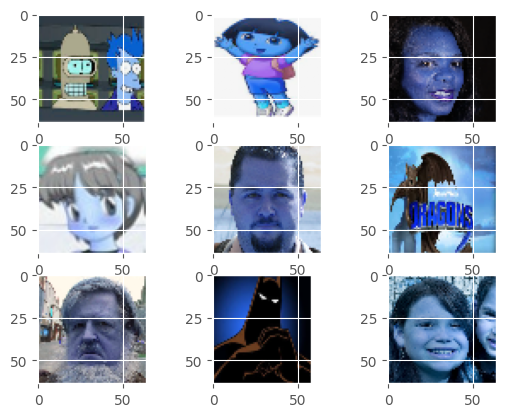

In [126]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [127]:
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', activation='relu',input_shape=(compression_size, compression_size, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))   #Removing MaxPooling layer: Add accuracy but reduces training speed
model.add(Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 16384)             0         
                                                                 
 dense_24 (Dense)            (None, 256)              

In [128]:
X_train

array([[[[0.9254902 , 0.9254902 , 0.9254902 ],
         [0.92156863, 0.92156863, 0.92156863],
         [0.972549  , 0.972549  , 0.972549  ],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.93333334, 0.93333334, 0.93333334],
         [0.94509804, 0.94509804, 0.94509804]],

        [[0.9098039 , 0.9098039 , 0.9098039 ],
         [0.93333334, 0.93333334, 0.93333334],
         [0.96862745, 0.96862745, 0.96862745],
         ...,
         [0.95686275, 0.95686275, 0.95686275],
         [0.92941177, 0.92941177, 0.92941177],
         [0.94509804, 0.94509804, 0.94509804]],

        [[0.9372549 , 0.9372549 , 0.9372549 ],
         [0.9137255 , 0.9137255 , 0.9137255 ],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.94509804, 0.94509804, 0.94509804],
         [0.92941177, 0.92941177, 0.92941177],
         [0.95686275, 0.95686275, 0.95686275]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [129]:
Y_train

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [130]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=15) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [134]:
INIT_LR = 0.0001
epochs = 10
opt = Adam(learning_rate=INIT_LR)

model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, checkpoint])

model.evaluate(X_val, Y_val)

Epoch 1/10
71/71 [==============================] - 43s 555ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.1324 - val_accuracy: 0.9788
Epoch 2/10
71/71 [==============================] - 35s 489ms/step - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.0968 - val_accuracy: 0.9815
Epoch 3/10
71/71 [==============================] - 36s 511ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0946 - val_accuracy: 0.9854
Epoch 4/10
71/71 [==============================] - 36s 508ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0917 - val_accuracy: 0.9881
Epoch 5/10
71/71 [==============================] - 38s 539ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0978 - val_accuracy: 0.9868
Epoch 6/10
71/71 [==============================] - 37s 527ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.1053 - val_accuracy: 0.9881
Epoch 7/10
71/71 [==============================] - 36s 510ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.1078 - val_accuracy: 0.9868

[0.10359101742506027, 0.9854304790496826]

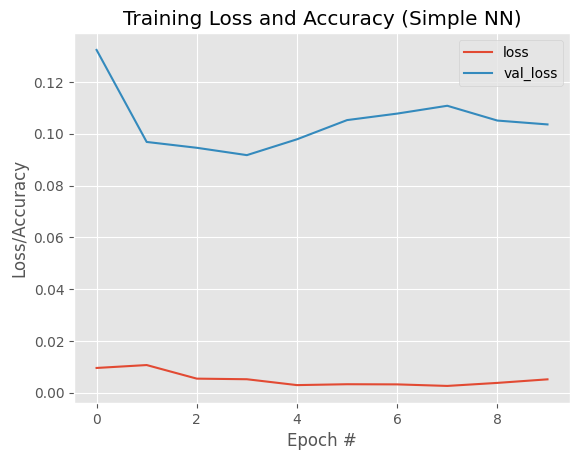

In [135]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

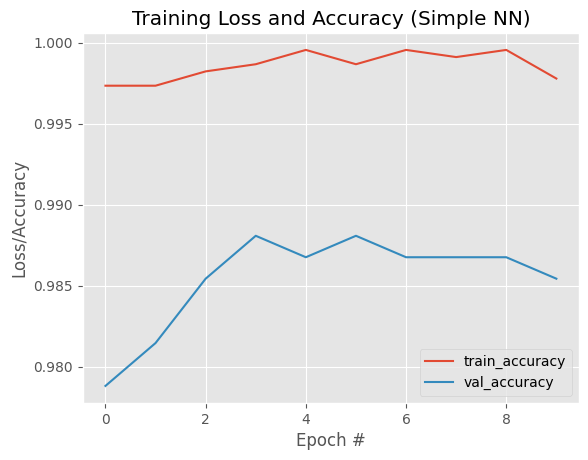

In [136]:
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [137]:
modelAfter = keras.models.load_model('/content/best_model.h5')

In [138]:
predictions = modelAfter.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

24/24 [==============================] - 3s 111ms/step
              precision    recall  f1-score   support

      Images       0.00      0.00      0.00         2
       anime       1.00      1.00      1.00       246
     cartoon       0.98      1.00      0.99       257
       human       0.99      0.99      0.99       250

    accuracy                           0.99       755
   macro avg       0.74      0.75      0.74       755
weighted avg       0.99      0.99      0.99       755



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.3. Сохраните полученные модели

In [140]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [141]:
model_path = "/content/gdrive/MyDrive/model/model.keras"
labels_path = "/content/gdrive/MyDrive/label/labels"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [142]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import keras
from keras import backend as K

In [143]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [144]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [145]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

print(test.shape)
print(train.shape)

(80, 64, 64)
(320, 64, 64)


### 3.1.2. Отрисуйте несколько примеров

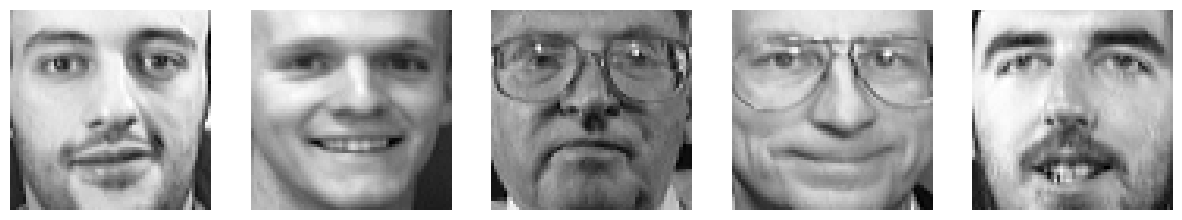

In [146]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [147]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]

X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [148]:
print(X_train.shape)
print(y_train.shape)

(320, 32, 64)
(320, 32, 64)


Вот один пример обучающей пары.

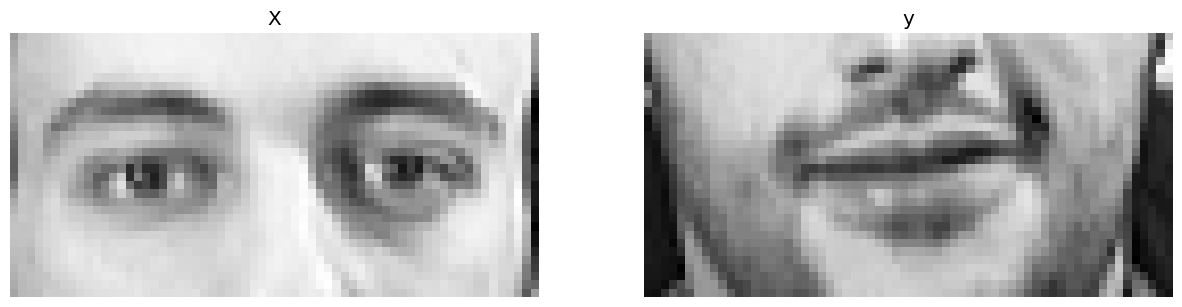

In [149]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

## 3.2. Создайте архитектуру для этой задачи

In [150]:
model2 = keras.Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(32*64,  activation='sigmoid')
])

model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 64, 128)       1280      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 16, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 32, 64)        73792     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 8, 16, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 8192)              0         
                                                                 
 dense_27 (Dense)            (None, 4096)            

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [151]:
y_train = y_train.reshape(len(y_train), 2048)
y_test = y_test.reshape(len(y_test), 2048)

print(y_train.shape)
print(y_test.shape)


(320, 2048)
(80, 2048)


In [152]:
INIT_LR = 0.001
opt = Adam(learning_rate=INIT_LR)

model2.compile(optimizer=opt,
             loss='mse',
             metrics=['mse'])

history = model2.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test))

model2.evaluate(X_test, y_test)

Epoch 1/5
10/10 [==============================] - 9s 858ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 2/5
10/10 [==============================] - 8s 839ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 3/5
10/10 [==============================] - 7s 711ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 4/5
10/10 [==============================] - 8s 857ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 5/5
3/3 [==============================] - 0s 112ms/step - loss: 0.0170 - mse: 0.0170


[0.017032800242304802, 0.017032800242304802]

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


## 3.5. Сделайте предсказания на тестовых данных

In [153]:
preds = model2.predict(X_test, batch_size=16)

5/5 [==============================] - 0s 55ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [154]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

0.103827566

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [155]:
preds = preds.reshape(80, 32, 64)
y_test = y_test.reshape(80, 32, 64)

print(preds.shape)

(80, 32, 64)


Отрисуйте все предсказания.

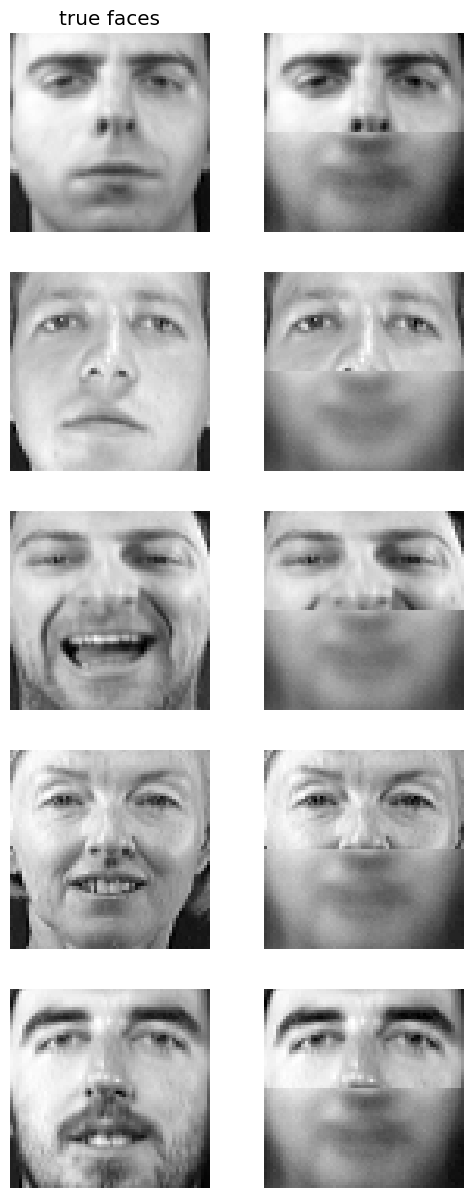

In [156]:
n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], preds[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )